# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [5]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
#!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user
# Installing the libraries with the specified version.

!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 opencv-python==4.8.0.76  -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [6]:
import os
import numpy as np                          # Importing numpy for Matrix Operations
import pandas as pd                         # Importing pandas to read CSV files
import matplotlib.pyplot as plt             # Importting matplotlib for Plotting and visualizing images
import math                                 # Importing math module to perform mathematical operations
import cv2                                  # Importing openCV for image processing
import seaborn as sns                       # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential     # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD    # Importing the optimizers which can be used in our model
from sklearn import preprocessing   # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix     # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer
# Display images using OpenCV
from google.colab.patches import cv2_imshow      # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
import random
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the dataset

In [7]:
# Load the image file of the dataset
images = np.load('/content/drive/MyDrive/Plant seeding classification/images.npy')

# Load the labels file of the dataset
labels = pd.read_csv('/content/drive/MyDrive/Plant seeding classification/Labels.csv')

## Data Overview

### Understand the shape of the dataset

In [9]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


**Observations**

*   There are 4750 RGB  images of shape 128 x 128 X 3, each image having 3 channels.




## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

## Plotting images using OpenCV and matplotlib

In [10]:
#Define a function to plot images and its labels. Function will plot 3 rows and 4 columns with image/label.
def plot_images(images,labels):
  num_classes=12                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

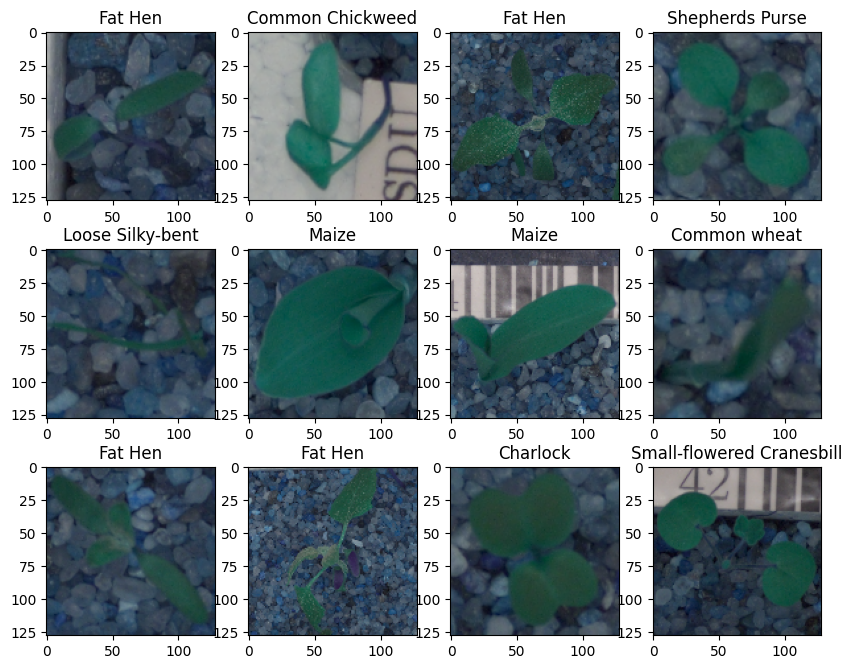

In [11]:
plot_images(images,labels)

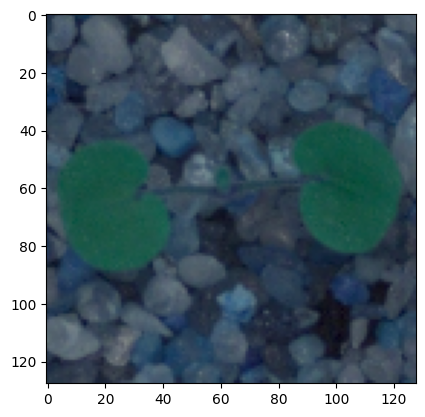

In [12]:
plt.imshow(images[0])

**Observation**



The images appear in different colors when plotted with OpenCV and Matplotlib.


This occurs because OpenCV reads images in BGR format, whereas Matplotlib expects RGB format.


The given NumPy arrays were generated from the original images using OpenCV.
To interpret the images correctly, we can convert them from BGR to RGB.

### Checking the distribution of the target variable

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Small-flowered Cranesbill'),
  Text(1, 0, 'Fat Hen'),
  Text(2, 0, 'Shepherds Purse'),
  Text(3, 0, 'Common wheat'),
  Text(4, 0, 'Common Chickweed'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Cleavers'),
  Text(7, 0, 'Scentless Mayweed'),
  Text(8, 0, 'Sugar beet'),
  Text(9, 0, 'Maize'),
  Text(10, 0, 'Black-grass'),
  Text(11, 0, 'Loose Silky-bent')])

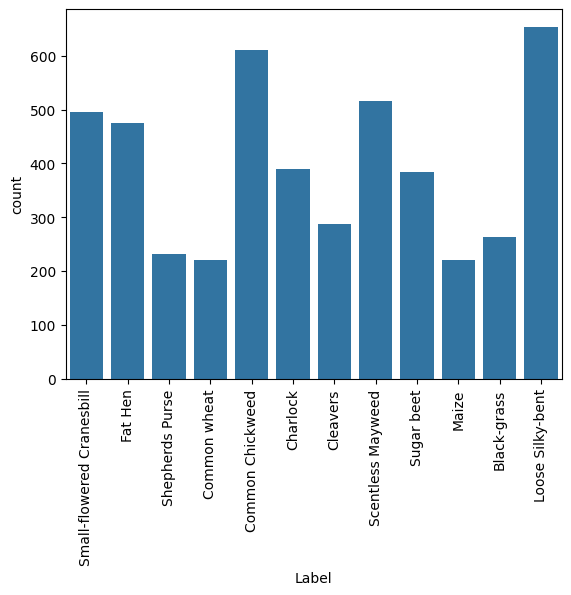

In [13]:
sns.countplot(x=labels['Label'])
plt.xticks(rotation='vertical')

**Observation**



There are 12 different categories of plants.


The majority of plants belong to the Loose Silky-bent category, followed by Common Chickweed and Small-flowered Cranesbill.


A slight imbalance in the data is observed from the graph.




## Data Pre-Processing

### Convert the BGR images to RGB images.

In [14]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [15]:
images_decreased=[]  # list to hold decreased images
height = 64 # set new height
width = 64 # set new width
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

**Image before resizing**

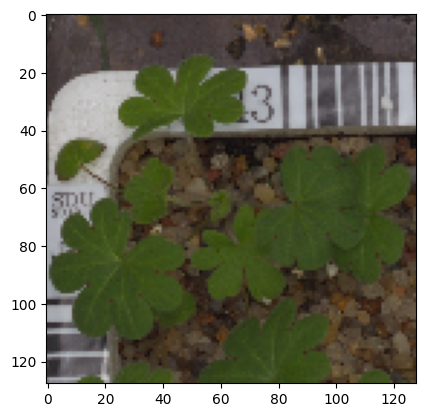

In [16]:
plt.imshow(images[3])

**Image after resizing**

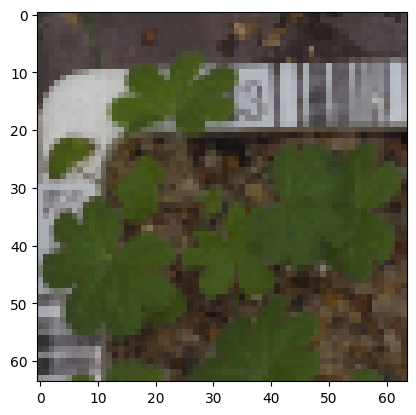

In [17]:
plt.imshow(images_decreased[3])

## Visualizing images using Gaussian Blur

In [18]:
# Applying Gaussian Blur to denoise the images
images_gb=[]
for i in range(len(images)):
  # gb[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
  images_gb.append(cv2.GaussianBlur(images[i], ksize =(3,3),sigmaX =  0))

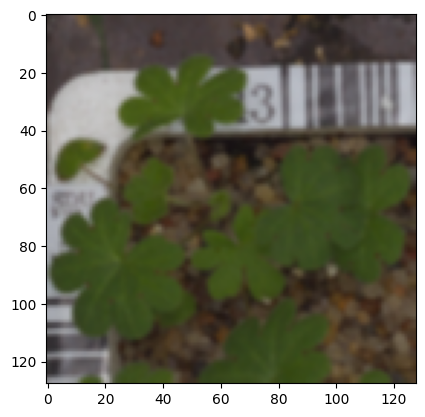

In [19]:
plt.imshow(images_gb[3])

**Observation**

GaussianBlur appears to be ineffective in this case.


The blurred or denoised image does not retain relevant information.


The model would struggle to categorize these blurred images.

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [20]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels , test_size=0.1, random_state=42,stratify=labels) #Split 10 % of data for test. The rest 90% will be temp data
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=42,stratify=y_temp) #Split 10% of data out of temp data for validation and the rest 90% will be for training

In [21]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


**Observation**



* The training set contains approximately 3,847 images of size 64x64x3.


The validation set contains approximately 428 images of size 64x64x3.


The test set contains approximately 475 images of size 64x64x3.


### Encode the target labels

The 'y' value needs to be normalized to one hot vectors which means that the label names/classes will be converted to one hot vectors.

In [22]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

In [23]:
print(X_train.shape,y_train_encoded.shape)
print(X_val.shape,y_val_encoded.shape)
print(X_test.shape,y_test_encoded.shape)

(3847, 64, 64, 3) (3847, 12)
(428, 64, 64, 3) (428, 12)
(475, 64, 64, 3) (475, 12)


**Observation**

*   The 'y' values have been encoded to 12 class categories.



### Data Normalization

Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [24]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## Model Building

Creating a CNN model sequentially, where we will be adding the layers one after another.

In [25]:
# Clearing backend
backend.clear_session()

In [26]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

####Imbalanced data

Since the dataset is imbalanced, we can use class weights to balance the data and prevent the model from being biased.

In [27]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Get y_train  class labels for the training data
labelList = y_train.Label.unique()


class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.array(labelList),
                                     y=y_train.values.reshape(-1))
class_weights_dict = dict(zip(np.array(range(len(labelList))), class_weights))



In [28]:
print(class_weights_dict)

{0: 1.714349376114082, 1: 0.7669457735247209, 2: 0.7974709784411277, 3: 1.5050860719874803, 4: 1.3818247126436782, 5: 0.8348524305555556, 6: 1.7909683426443204, 7: 0.6476430976430977, 8: 1.0145042194092826, 9: 1.0275106837606838, 10: 0.604874213836478, 11: 1.7909683426443204}


**Model 1: CNN Model - Balanced data treatment**

Now, let's build a **CNN Model** with the following 2 main parts - <br>

1. **The Feature Extraction layers** which are comprised of convolutional and pooling layers.
2. **The Fully Connected classification layers** for prediction.<br><br>

In [29]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 128 neurons
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model.add(Dense(12, activation='softmax')) # 12 neurons since we have a class of 12 that needs to be categorised

# Using Adam Optimizer
opt=Adam()
# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) #  We are using  categorical_crossentropy as a measure for loss since it is a multi classification problem

# Generating the summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 12)                  │             780 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 367,148 (1.40 MB)

 Trainable params: 367,148 (1.40 MB)

 Non-trainable params: 0 (0.00 B)

**Observation**


*   There are about 367148  trainable params.



<b> Fitting the model on the train data

In [30]:
# Fitting model with normalised data and encoded classes. Iterations will be 30 epochs on a batch size of 32. To balance the data , we can provide the calculated class weights

history_1 = model.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),class_weight=class_weights_dict,
            batch_size=32,
            verbose=2
)

Epoch 1/30
121/121 - 14s - 116ms/step - accuracy: 0.1367 - loss: 2.8095 - val_accuracy: 0.1379 - val_loss: 2.4472
Epoch 2/30
121/121 - 10s - 83ms/step - accuracy: 0.2285 - loss: 2.4664 - val_accuracy: 0.3271 - val_loss: 1.8583
Epoch 3/30
121/121 - 2s - 18ms/step - accuracy: 0.3460 - loss: 1.9717 - val_accuracy: 0.4112 - val_loss: 1.5682
Epoch 4/30
121/121 - 1s - 11ms/step - accuracy: 0.3980 - loss: 1.8043 - val_accuracy: 0.4556 - val_loss: 1.7118
Epoch 5/30
121/121 - 3s - 21ms/step - accuracy: 0.4624 - loss: 1.6371 - val_accuracy: 0.4977 - val_loss: 1.4466
Epoch 6/30
121/121 - 3s - 21ms/step - accuracy: 0.5188 - loss: 1.4799 - val_accuracy: 0.5631 - val_loss: 1.2119
Epoch 7/30
121/121 - 3s - 22ms/step - accuracy: 0.5591 - loss: 1.3594 - val_accuracy: 0.5841 - val_loss: 1.1531
Epoch 8/30
121/121 - 2s - 13ms/step - accuracy: 0.5971 - loss: 1.2363 - val_accuracy: 0.6005 - val_loss: 1.0513
Epoch 9/30
121/121 - 3s - 21ms/step - accuracy: 0.6348 - loss: 1.1282 - val_accuracy: 0.6729 - val_lo

**Observation**



*   After 30 epochs, the loss on the training data is 0.34, while the loss on the validation data is approximately 0.78.


The significant difference in loss between training and validation data suggests potential overfitting.


The accuracy on the training data is 89%, whereas the accuracy on the validation set is 79%.


This accuracy gap further indicates that the model could be overfitting.


**Model Evaluation**

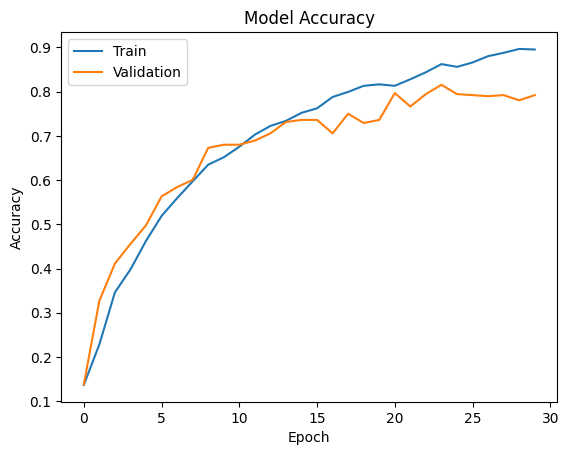

In [31]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observation**



*   Accuracy on training and validation set increases but after about 15th epoch, the accuracy on validation set seems to decrease and goes below training accuracy.


*   The model seems to overfit on the data.




### **Evaluating the model on test data**

In [33]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - 8ms/step - accuracy: 0.7979 - loss: 0.8810


**Observation**


*   Accuracy on test data is about 80%


### **Plotting the Confusion Matrix**

In [34]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


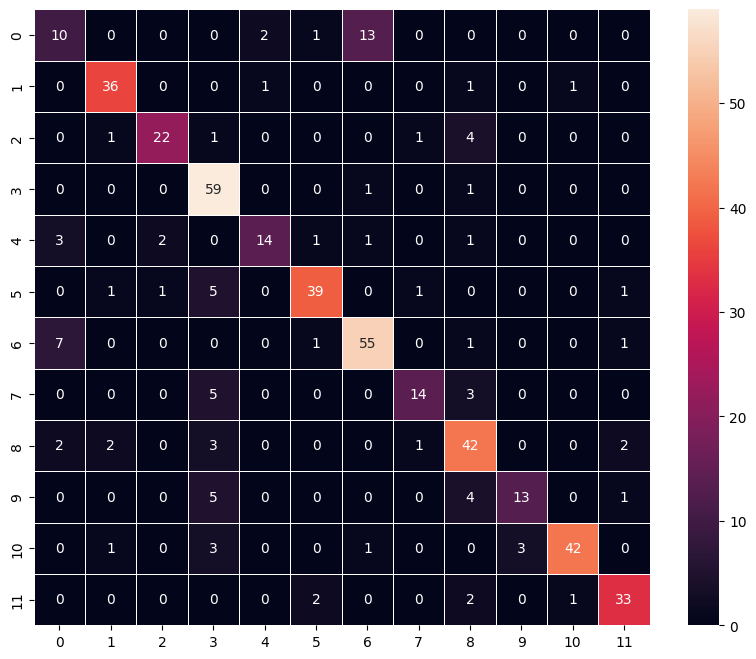

In [35]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

**Observation**



*   We can observe that classes 3 and 6 are well classified.
*   Classes 0,2,4,7,9 are mostly misclassified.

It appears that classes are not predicted correctly



## Model Performance Improvement

**Model 2: CNN Model - Data Augmentation and Batch Normalization**

As we can see, our initial model appears to overfit. Therefore we'll try to address this problem with data augmentation and Batch Normalization to check if we can improve the model's performance.

In [36]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [37]:
# All images to be rescaled by 1/255. We will use ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )

**ReduceLRonPlateau()** is a function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [38]:
# Code to monitor val_accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [39]:
# Intializing a sequential model
model2 = Sequential()

# Adding first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model2.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2), padding = 'same'))

model2.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))

model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding = 'same'))

model2.add(BatchNormalization()) # Batch normalization before FC layer

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 128 neurons
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.3))

model2.add(Dense(64, activation='relu'))


# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
model2.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
opt=Adam()
# Compile model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) #  We are using  categorical_crossentropy as a measure for loss since it is a multi classification problem

# Generating the summary of the model
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 8, 8, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 12)                  │             780 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 367,276 (1.40 MB)

 Trainable params: 367,212 (1.40 MB)

 Non-trainable params: 64 (256.00 B)

**Observation**



In [40]:
# Epochs
epochs = 30
# Batch size
batch_size = 32

history2 = model2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       shuffle=False),
                                       epochs=epochs,
                                       steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,callbacks=[learning_rate_reduction],class_weight=class_weights_dict)

Epoch 1/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 14s 75ms/step - accuracy: 0.2097 - loss: 2.5339 - val_accuracy: 0.1542 - val_loss: 2.3177 - learning_rate: 0.0010
Epoch 2/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4375 - loss: 2.1468 - val_accuracy: 0.1472 - val_loss: 2.3265 - learning_rate: 0.0010
Epoch 3/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.5032 - loss: 1.5426 - val_accuracy: 0.2664 - val_loss: 2.1622 - learning_rate: 0.0010
Epoch 4/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5625 - loss: 1.3976 - val_accuracy: 0.2827 - val_loss: 2.1761 - learning_rate: 0.0010
Epoch 5/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - accuracy: 0.6141 - loss: 1.2224 - val_accuracy: 0.2780 - val_loss: 1.9623 - learning_rate: 0.0010
Epoch 6/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6562 - loss: 1.1972 - val_accuracy: 0.2734 - val_loss: 1.9977 - learning_rate: 0.0010
Epoch 7/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.6791 - loss: 1.0

**Observation**



*   After 30 epochs , the training loss is about 0.31 and validation loss is about 0.51. Even though there is a variation in loss between training and validation set, it seems to be better than the model 1.
*   The training accuracy has improved to be 88% and validation accuracy is about 85%. Though the model seems to be overfitting, accuracy has improved from previous model.



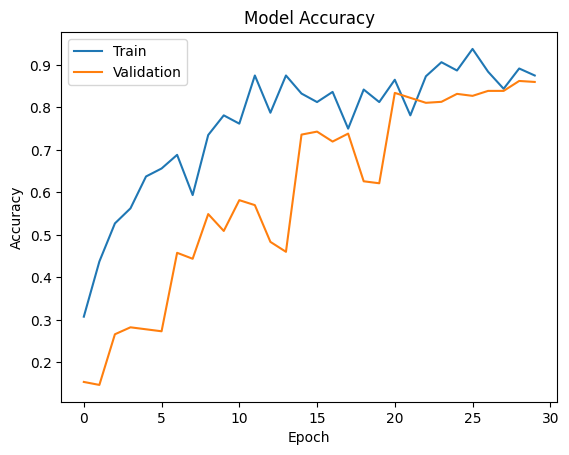

In [41]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observation**


Accuracy has improved compared to our previous model.

**Evaluate the model on test data**

In [42]:
accuracy2 = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - 58ms/step - accuracy: 0.8253 - loss: 0.5686


**Observation**



*   We can observe that test accuracy has improved compared to our previous model and is 83%.



**Plotting the Confusion Matrix**

In [45]:
# Here we would get the output as probablities for each category
y_pred2=model2.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


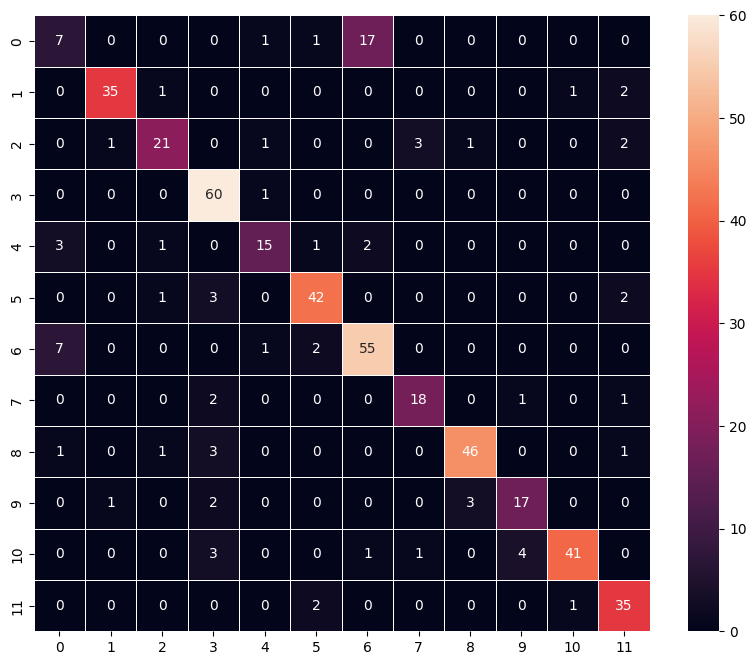

In [46]:
#  categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred2,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

#  Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

**Observation**



*   We can observe that classes 3 is well classified.
*   Classes 0,4,7,9 are mostly misclassified.
*   Classification on other classes have improved when compared to the previous model




**Model 3: CNN Model - Transfer learning**

For plant classification tasks, using a pre-trained model can significantly boost the performance and reduce the training time, especially if the dataset is not very large.

Lets use pre-trained model VGG16 to train our model

In [ ]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))
vgg_model.summary()

58889256/58889256 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [ ]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
new_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model.add(Flatten())

# Adding a dense output layer
new_model.add(Dense(128, activation='relu'))
new_model.add(Dropout(0.2))
new_model.add(Dense(64, activation='relu'))
new_model.add(Dense(32, activation='relu'))
new_model.add(Dense(12, activation='softmax'))
opt=Adam()
# Compile model
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               262272    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 12)               

**Observation**



*   The total trainable param is about 14987692  .



In [ ]:
# Epochs
epochs = 30
# Batch size
batch_size = 32

history_vgg16 = new_model.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       shuffle=False),
                                       epochs=epochs,
                                       steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                                       validation_data=(X_val_normalized,y_val_encoded),
                                       verbose=1,callbacks=[learning_rate_reduction],class_weight=class_weights_dict)

Epoch 1/30
120/120 [==============================] - 11s 68ms/step - loss: 2.4294 - accuracy: 0.2592 - val_loss: 2.0569 - val_accuracy: 0.2780 - lr: 0.0010
Epoch 2/30
120/120 [==============================] - 6s 47ms/step - loss: 1.9024 - accuracy: 0.3683 - val_loss: 1.7042 - val_accuracy: 0.3972 - lr: 0.0010
Epoch 3/30
120/120 [==============================] - 6s 52ms/step - loss: 1.6987 - accuracy: 0.4364 - val_loss: 1.6341 - val_accuracy: 0.4252 - lr: 0.0010
Epoch 4/30
120/120 [==============================] - 7s 60ms/step - loss: 1.5947 - accuracy: 0.4739 - val_loss: 1.4921 - val_accuracy: 0.4533 - lr: 0.0010
Epoch 5/30
120/120 [==============================] - 6s 48ms/step - loss: 1.4550 - accuracy: 0.5117 - val_loss: 1.4350 - val_accuracy: 0.4673 - lr: 0.0010
Epoch 6/30
120/120 [==============================] - 6s 49ms/step - loss: 1.3816 - accuracy: 0.5326 - val_loss: 1.4992 - val_accuracy: 0.4720 - lr: 0.0010
Epoch 7/30
120/120 [==============================] - 6s 51ms/s

**Observation**


*   After 30 epochs , the training loss is 0.70 and validation loss is  1.066. The loss is very high when compared to the previous model.
*   The training accuracy is 76% and validation accuracy is about 62%.

*   Model does not seem to be performing well when compared to the previous models.

However, lets look at test accuracy and confusion matrix.



**Evaluate the model on test data**

In [ ]:
accuracy3 = new_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - loss: 1.1288 - accuracy: 0.6337 - 1s/epoch - 83ms/step


**Observation**


*   Accuracy on test data is 63% which is low when compared to the previous models.




**Plotting the Confusion Matrix**

In [ ]:
# Here we would get the output as probablities for each category
y_pred3=new_model.predict(X_test_normalized)

15/15 [==============================] - 0s 16ms/step


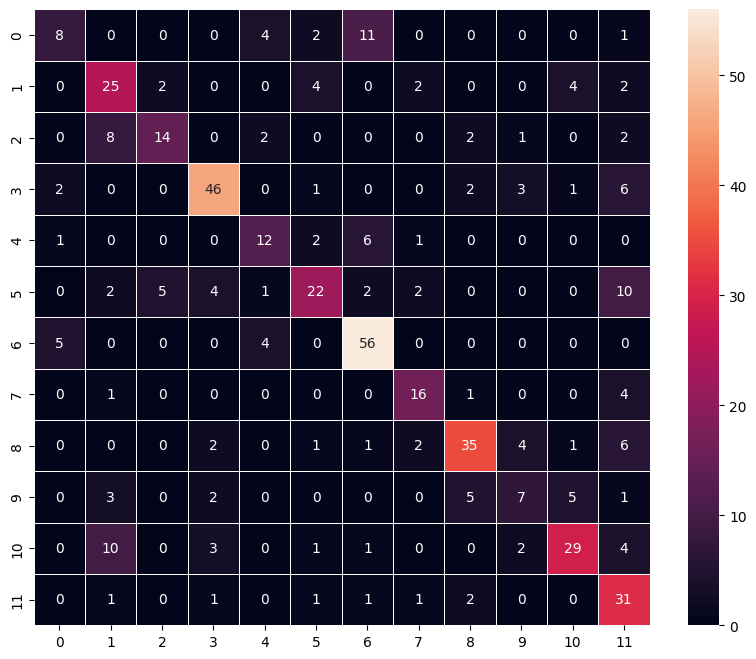

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred3,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

**Observation**



*  Class 6 is well classified.


Classes 0, 2, 4, 7, and 9 are mostly misclassified.


Classification performance on other classes has not improved.


The model does not seem to predict the categories well.

## Final Model

Based on the confusion matrix and accuracy curve, Model 2 (CNN Model with Data Augmentation and Batch Normalization), using balanced class weights, has outperformed all other models.


Therefore, this model can be used to predict and visualize test images.

### Visualizing the prediction

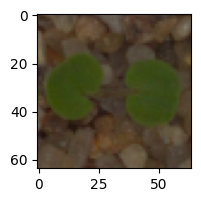

1/1 [==============================] - 0s 233ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


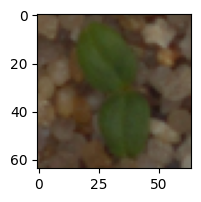

1/1 [==============================] - 0s 23ms/step
Predicted Label ['Cleavers']
True Label Cleavers


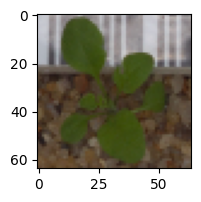

1/1 [==============================] - 0s 18ms/step
Predicted Label ['Shepherds Purse']
True Label Shepherds Purse


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])

The model performs well in predicting the test data and classifying the categories.


The confusion matrix shows that the CNN Model with Data Augmentation and Batch Normalization outperformed other models in predicting most classes.


The test accuracy of the model is 83%.


Data Augmentation and Batch Normalization have contributed to the model's improvement.


Balancing the class weights has also helped improve the model.

## Actionable Insights and Business Recommendations

Leveraging the CNN model for plant classification with data augmentation and batch normalization can lead to innovative solutions and services addressing key agricultural needs.


These business recommendations aim to improve plant health management, enhance research and education, and expand market opportunities.


The goal is to increase productivity and sustainability in the agricultural sector.


A plant health monitoring application could be developed to capture real-time images of plants and provide feedback on their health, benefiting the agricultural field.


Education tools or platforms can be created for training purposes, utilizing the model.


The model can also be used to classify and grade plants or produce during the harvest and post-harvest stages.

_____